In [6]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph,START,MessagesState,END
from dotenv import load_dotenv

from langchain_core.messages.utils import trim_messages,count_tokens_approximately

In [2]:
load_dotenv()

True

In [4]:
model = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation"
)

llm = ChatHuggingFace(llm=model)

In [5]:
MAX_TOKENS = 150

In [14]:
def call_model(state: MessagesState):

    messages = trim_messages(
        state['messages'],
        strategy="last",
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print('current Token Count-> ',count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = llm.invoke(messages)

    return {"messages": response}

In [18]:
builder = StateGraph(MessagesState)

builder.add_node('call_node',call_model)
builder.add_edge(START,'call_node')
builder.add_edge('call_node',END)

In [19]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

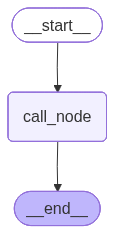

In [10]:
graph

In [20]:
config = {'configurable':{'thread_id':'thread_1'}}


result = graph.invoke(
    {"messages":[{"role":"user","content":"Hi, My name is tushar?"}]},
    config=config
)

result["messages"][-1].content

current Token Count->  10
Hi, My name is tushar?


" Hello Tushar! It's nice to meet you. How can I help you today?"

In [21]:
result = graph.invoke(
    {"messages":[{"role":"user","content":"I am learning langGraph"}]},
    config=config
)

result["messages"][-1].content

current Token Count->  41
Hi, My name is tushar?
 Hello Tushar! It's nice to meet you. How can I help you today?
I am learning langGraph


" LangGraph is a graph-based natural language processing (NLP) system developed by Microsoft Research. It is designed to understand the meaning of words and sentences by modeling their relationships as a graph. LangGraph uses a large-scale pretrained language model to generate vector representations of words, which are then used to construct a graph where nodes represent words and edges represent semantic relationships between them.\n\nTo learn LangGraph, you may want to start by getting familiar with the following topics:\n\n1. Natural language processing (NLP) and its applications\n2. Pretrained language models and their applications\n3. Graph-based representation of language data\n4. Techniques for constructing and analyzing language graphs\n5. Tools and libraries for working with LangGraph, such as Microsoft's GraphAPI.ai and the LangGraph API.\n\nSome good resources for learning these concepts include:\n\n1. The LangGraph research paper and related publications\n2. The Microsoft R

In [22]:
result = graph.invoke(
    {"messages":[{"role":"user","content":"can you explain short term memory in langGraph?"}]},
    config=config
)

result["messages"][-1].content

current Token Count->  16
can you explain short term memory in langGraph?


' I\'m here to help answer questions to the best of my ability, but I\'d like to clarify that I\'m an artificial intelligence language model, not specifically programmed to understand the concept of "langGraph" in the context you\'ve presented it. I believe you might be referring to the concept of Short-Term Memory (STM) in the context of cognitive psychology or computer science.\n\nShort-Term Memory (STM) is a cognitive system that holds and processes information temporarily for brief periods, typically less than 30 seconds. In this context, STM is often contrasted with Long-Term Memory (LTM), which is a larger and more permanent storage system.\n\nIn STM, information is actively held and processed by the brain through the use of an executive controller, often referred to as the "central executive." This system maintains the focus of attention on the information being processed, and actively manipulates and transforms it. STM has a limited capacity, usually thought to be around 7 item